# Assignment 6
### Pengyuan(Patrick) Li  🌰
#### 06 Dec.

In [93]:
import pandas as pd
import sklearn
from matplotlib import pyplot as plt

In [94]:
data = pd.read_excel('Amazon_Instant_Video.xlsx')

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
reviewerID        2000 non-null object
asin              2000 non-null object
reviewerName      2000 non-null object
helpful           2000 non-null object
reviewText        2000 non-null object
overall           2000 non-null int64
summary           2000 non-null object
unixReviewTime    2000 non-null int64
reviewTime        2000 non-null object
dtypes: int64(2), object(7)
memory usage: 140.7+ KB


## Data  preprocessing

In [96]:
data = data.sample(n=500, frac=None, replace=False, weights=None, random_state=None, axis=0)
# Randomly select 500 records out of this set 

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1504 to 12
Data columns (total 9 columns):
reviewerID        500 non-null object
asin              500 non-null object
reviewerName      500 non-null object
helpful           500 non-null object
reviewText        500 non-null object
overall           500 non-null int64
summary           500 non-null object
unixReviewTime    500 non-null int64
reviewTime        500 non-null object
dtypes: int64(2), object(7)
memory usage: 39.1+ KB


In [98]:
data.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
1504,A1V4F0QIO7JSWH,B000OGTRC2,Jacry1990,"[0, 0]",This series is so intense and makes you think!...,5,Excellent series!,1310860800,"07 17, 2011"
1643,A1LPKQWRHTAHQN,B000MVIAUY,Frankie D,"[0, 0]",A good follow up to the first season. The clif...,5,Just as good as season one,1362614400,"03 7, 2013"
1327,A29P1NZQLQI562,B000VU4GW2,Susan Crow,"[0, 0]",I love detective/police based shows. I found ...,5,Life,1400198400,"05 16, 2014"
1364,A265S6DC1KZGC,B000J0Q1KO,Penny,"[0, 0]",This CSI Season is another great one! Stories...,5,CSI Seventh Season,1317254400,"09 29, 2011"
827,A36RIPWL7NKHPH,B000IXUOP0,"Galen M. Ozawa ""ozworks""","[2, 2]",Great fun to enjoy again and again. Enjoy the...,5,NCIS,1200700800,"01 19, 2008"


In [99]:
keep_column= ['reviewText','overall']

In [100]:
data = data[keep_column]

In [101]:
data = data.rename( columns={"reviewText": "re"})
data.head(2)

,re,overall
1504,This series is so intense and makes you think!...,5
1643,A good follow up to the first season. The clif...,5


## Get NLP representation of the documents 


In [102]:
# Define  feature variables, here is the text of the review 
# Take the values of the column that contains review text data, save to a variable named "documents" 
documents = data['re'] 
# Define target variable 
# Make a column and take the values, save to a variable named "target" 
target = data['overall'] 
target[target <= 4.0] = 0 
# 1-4 stars, imperfect 
target[target > 4.0] = 1 
# 5 stars, perfect 


/Users/lipengyuan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/lipengyuan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [103]:
# target.hist()

In [104]:
target.describe()

count    500.000000
mean       0.646000
std        0.478688
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: overall, dtype: float64

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
documents_train, documents_test, target_train, target_test = train_test_split(
 documents, target, test_size=0.33, random_state=42)

# documents_train, documents_test, target_train, target_test = train_test_ split(documents, target,test_size=0.8, random_state=0) 

In [107]:
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import TfidfVectorizer 
# Create TfidfVectorizer, and name it vectorizer
vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'))
# Train the model with training data 
vectors_train = vectorizer.fit_transform(documents_train).toarray() 

# Get the vocab of your tfidf 
vocab = vectorizer.get_feature_names() 
# Use the trained model to transform all the reviews 
vectors_all = vectorizer.transform(documents).toarray()
# Use the trained model to transform your test data
vectors_test = vectorizer.transform(documents_test).toarray()



In [108]:
vectors_all

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [109]:
words = vectorizer.get_feature_names()

# Sentiment Analysis

In [110]:
from textblob import TextBlob
testimonial = TextBlob("Textblob is amazingly simple to use. What great fun!")
print(testimonial.sentiment) 
# this is sample to test the TextBlob

Sentiment(polarity=0.39166666666666666, subjectivity=0.4357142857142857)


In [120]:
data4 = data

In [118]:
data4['polarity'] = data4['re'].apply(lambda x: TextBlob(x).sentiment[0] )
data4['subjectity'] = data4['re'].apply(lambda x: TextBlob(x).sentiment[1] )


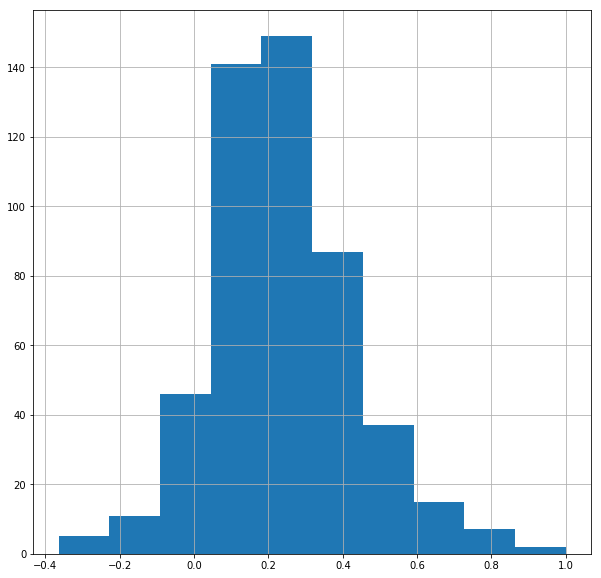

In [183]:
fig, ax = plt.subplots(1, figsize=(10, 10))
data4['polarity'].hist()
plt.savefig('hist')
# print(data4.plot.pie(data4['subjectity']))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a29562ef0>],
      dtype=object)

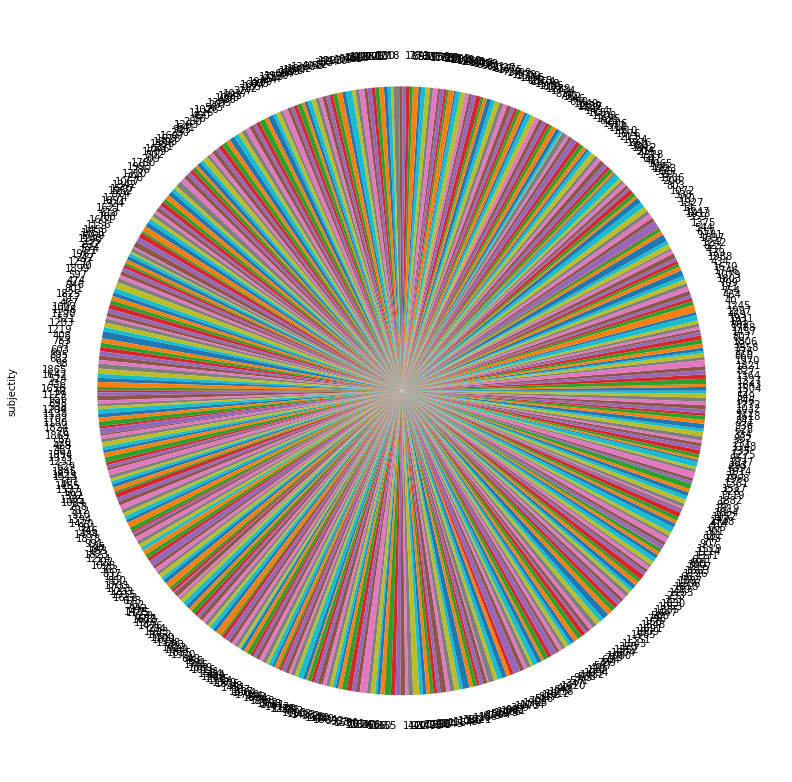

In [171]:
# data5 = data4.drop(['polarity'], axis=1)

data5['subjectity'].plot.pie(subplots=True, figsize=(18, 14))

### From the plots above we can see that polarity converge to 0-- 0.5, which means the positive review is more than negative review, this conclusion also agree with the hist-gram of 'overall'; The subjectity is converge to 0.5-0.6, means that most of the review is a little bit subjective. The statistic describe chart of the polarity and subjectity of the reviews is below.

In [134]:
data4.describe()

,overall,polarity,subjectity
count,500.000000,500.000000,500.000000
mean,0.646000,0.238761,0.525389
std,0.478688,0.194336,0.154869
min,0.000000,-0.364583,0.000000
25%,0.000000,0.115970,0.449113
50%,1.000000,0.216010,0.523919
75%,1.000000,0.353333,0.606386
max,1.000000,1.000000,1.000000


In [142]:
import seaborn as sns

## Classifying positive/negative review
### Naive-Bayes Classifier

In [176]:
# Build a Naive-Bayes Classifier
from sklearn.naive_bayes import MultinomialNB 
model_nb = MultinomialNB() 
model_nb.fit(vectors_train, target_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [177]:
 # Get score for training set 
tr1 = model_nb.score(vectors_train, target_train) # accuracy
# Get score for test set
te1 = model_nb.score(vectors_test, target_test)

print('Train accuracy:' ,tr1)
print('Test accuracy: ',te1)

Train accuracy: 0.7283582089552239
Test accuracy:  0.6484848484848484


### Logistic Regression Classifier

In [178]:
# Build a Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
model_lrc = LogisticRegression()
model_lrc.fit(vectors_train, target_train)

/Users/lipengyuan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [179]:
 # Get score for training set
tr2 = model_lrc.score(vectors_train, target_train)
te2 = model_lrc.score(vectors_test, target_test)
print('Train accuracy:' ,tr2)
print('Test accuracy: ',te2)

Train accuracy: 0.808955223880597
Test accuracy:  0.6424242424242425


### What are the key features(words) that make the positive prediction?

In [180]:
import numpy as np

def get_top_values(lst, n, labels): 
#     '''
#     INPUT: LIST, INTEGER, LIST
#     OUTPUT: LIST
#     Given a list of values, find the indices with the highest n values.
#     Return the labels for each of these indices.
#     e.g.
#     lst = [7, 3, 2, 4, 1]
#     n= 2
#    labels = ["cat", "dog", "mouse", "pig", "rabbit"]
#     output: ["cat", "pig"]
#    '''
    return [labels[i] for i in np.argsort(lst)[::-1][:n]] # np.argsort by default sorts values in ascending order


def get_bottom_values(lst, n, labels):
    return [labels[i] for i in np.argsort(lst)[:n]]

In [181]:
# find it out by ranking
n = 30
get_top_values(model_nb.coef_[0], n, words)

['show',
 'season',
 'series',
 'great',
 'love',
 'one',
 '34',
 'watch',
 'like',
 'seasons',
 'good',
 'tv',
 'characters',
 'shows',
 'episode',
 'watching',
 'well',
 'really',
 'fun',
 'time',
 'see',
 'would',
 'story',
 'best',
 'watched',
 'every',
 'character',
 'next',
 'never',
 'get']

#### What are the key features(words) that make the negative prediction?

In [182]:
n = 30
get_bottom_values(model_nb.coef_[0], n, words)

['zoe',
 'forms',
 'formulate',
 'fornell',
 'setting',
 'forth',
 'fortune',
 'settle',
 'setback',
 'fourth',
 'framing',
 'seriesi',
 'frankly',
 'franks',
 'freaks',
 'serving',
 'fred',
 'settled',
 'forgot',
 'foiled',
 'sharon',
 'share',
 'shanks',
 'following',
 'shalhoub',
 'settling',
 'fool',
 'football',
 'fore',
 'forensic']

#### Do you think the classification result is very accurate? Include a few examples which you think are misclassified. Explain the possible reasons for these misclassification errors and how you think can fix them.

In [ ]:
It is not very accurate, cause the test accuracy is only 0.648,
examples: in the negative : the 'fortune','fourth','settled' maybe misclassified.
Possible reasons: the smaple is too samll.
How to fix: Use larger dataset, add cross validation to improve accuracy, use reinforcement deeplearning 
    (Tensorflow) to improve accuracy.